### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.**

### Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Variable|Description   
:---- |:----
Item_Identifier|Unique product ID
Item_Weight|Weight of product
Item_Fat_Content|Whether the product is low fat or not
Item_Visibility|The % of total display area of all products in a store allocated to the particular product
Item_Type|The category to which the product belongs
Item_MRP|Maximum Retail Price (list price) of the product
Outlet_Identifier|Unique store ID
Outlet_Establishment_Year|The year in which store was established
Outlet_Size|The size of the store in terms of ground area covered
Outlet_Location_Type|The type of city in which the store is located
Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.

### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the **Root Mean Square Error** value to judge your response.



Where,
N: total number of observations
Predicted: the response entered by user
Actual: actual values of sales

Also, note that the test data is further divided into Public (25%) and Private (75%) data. Your initial responses will be checked and scored on the Public data. But, the final rankings will be based on score on Private data set. Since this is a practice problem, we will keep declare winners after specific time intervals and refresh the competition.
 

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import scipy.stats as st
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
train_file  = 'train.csv'
test_file  = 'test.csv'

In [4]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [5]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
def get_predictors(df,target):
    return [col for col in df.columns if col!=target]

In [7]:
def extended_describe(dataframe):
    extended_describe_df= dataframe.describe(include='all').T 
    extended_describe_df['null_count']= dataframe.isnull().sum()
    extended_describe_df['unique_count'] = dataframe.apply(lambda x: len(x.unique()))
    return extended_describe_df 

In [8]:
target ='Item_Outlet_Sales'

In [9]:
predictors = get_predictors(train_df,target)

In [10]:
extended_describe(train_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
Item_Identifier,8523,1559,FDG33,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1559
Item_Weight,7060.0000,NaN,NaN,NaN,12.8576,4.6435,4.5550,8.7737,12.6000,16.8500,21.3500,1463,416
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Item_Visibility,8523.0000,NaN,NaN,NaN,0.0661,0.0516,0.0000,0.0270,0.0539,0.0946,0.3284,0,7880
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
Item_MRP,8523.0000,NaN,NaN,NaN,140.9928,62.2751,31.2900,93.8265,143.0128,185.6437,266.8884,0,5938
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10
Outlet_Establishment_Year,8523.0000,NaN,NaN,NaN,1997.8319,8.3718,1985.0000,1987.0000,1999.0000,2004.0000,2009.0000,0,9
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410,4
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


In [11]:
extended_describe(test_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
Item_Identifier,5681,1543,FDK57,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1543
Item_Weight,4705.0000,NaN,NaN,NaN,12.6956,4.6648,4.5550,8.6450,12.5000,16.7000,21.3500,976,411
Item_Fat_Content,5681,5,Low Fat,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Item_Visibility,5681.0000,NaN,NaN,NaN,0.0657,0.0513,0.0000,0.0270,0.0542,0.0935,0.3236,0,5277
Item_Type,5681,16,Snack Foods,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
Item_MRP,5681.0000,NaN,NaN,NaN,141.0233,61.8091,31.9900,94.4120,141.4154,186.0266,266.5884,0,4402
Outlet_Identifier,5681,10,OUT027,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10
Outlet_Establishment_Year,5681.0000,NaN,NaN,NaN,1997.8289,8.3723,1985.0000,1987.0000,1999.0000,2004.0000,2009.0000,0,9
Outlet_Size,4075,3,Medium,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1606,4
Outlet_Location_Type,5681,3,Tier 3,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


In [12]:
replace_fc = {'LF': 'Low Fat', 'low fat': 'Low Fat' ,'low fat':'Low Fat','reg':'Regular' }

In [13]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].map(replace_fc)

test_df['Item_Fat_Content'] =  test_df['Item_Fat_Content'].map(replace_fc)

In [14]:
profile = pandas_profiling.ProfileReport(train_df)
profile.to_file(output_file="BigMart data profiling.html")

In [15]:
train_num_df = train_df.select_dtypes(include=['float64','int64'])

In [16]:
train_num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.3000,0.0160,249.8092,1999,3735.1380
1,5.9200,0.0193,48.2692,2009,443.4228
2,17.5000,0.0168,141.6180,1999,2097.2700
3,19.2000,0.0000,182.0950,1998,732.3800
4,8.9300,0.0000,53.8614,1987,994.7052


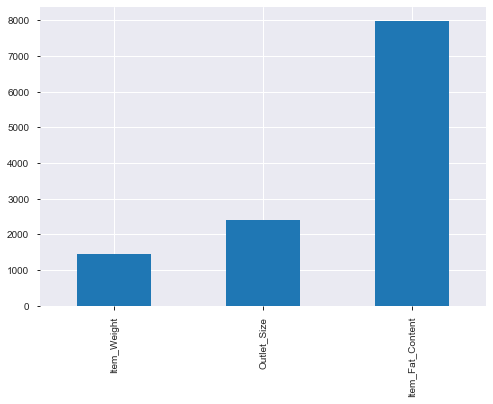

In [17]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [18]:
# Also none of quantitative variables has normal distribution so these should be transformed as well.
test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_num_df)
normal = normal.apply(test_normality)
print(not normal.any())

False


In [19]:
def plot_histograms(df):
    f = pd.melt(df) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

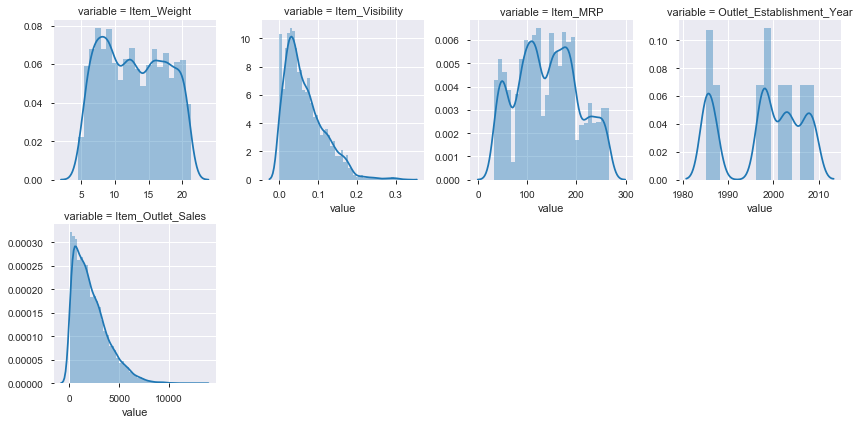

In [20]:
plot_histograms(train_num_df)

#### Inferences on Numeric columns

>- **Item_Weight**: Doesn't have uniform distribution as it depends type of item 
- **Item_Visibility**: Right skewed distribution,check if we need to apply power transformation to reduce the skewness
- **Item_MRP**: Doesn't have uniform distribution as it depends type of item
- **Item_Outlet_Sales**: Check if we need apply any log transformation 


In [21]:
exclude_cols  = list(train_num_df.columns)
exclude_cols.append('Item_Identifier')
qualitative = [col for col in train_df.columns if col not in  exclude_cols] 

In [22]:
for column in qualitative:
    train_df[column] = train_df[column].astype('category')
    if train_df[column].isnull().any():
        train_df[column] = train_df[column].cat.add_categories(['MISSING'])
        train_df[column] = train_df[column].fillna('MISSING')

In [23]:
def plot_countplot(df):
    f = pd.melt(df) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g.set_xticklabels(rotation=90)
    g = g.map(sns.countplot, 'value')
    
    return g

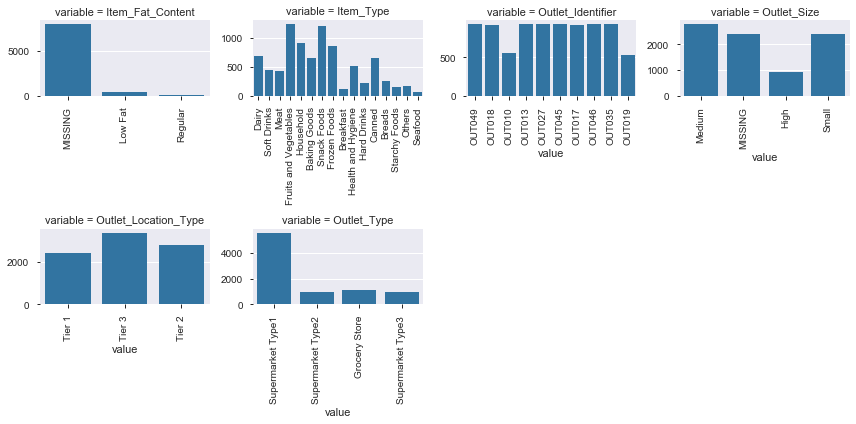

In [24]:
plot_countplot(train_df[qualitative])

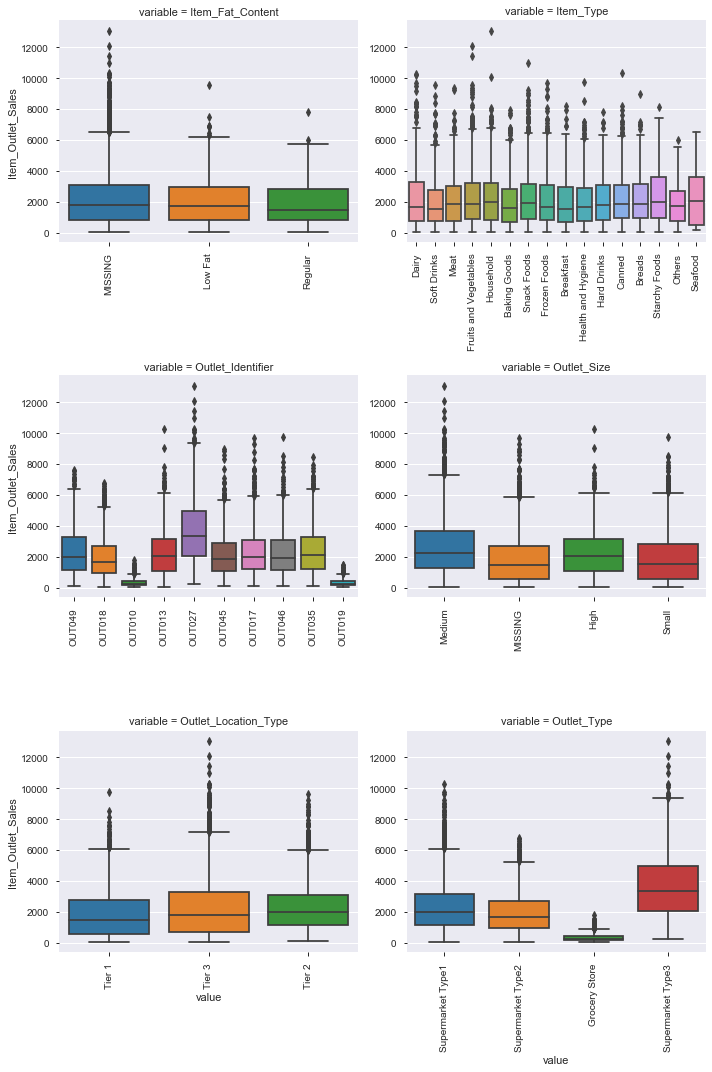

In [25]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_df, id_vars=['Item_Outlet_Sales'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Item_Outlet_Sales")

#### Inferences  from categorical variables
> - **Outlet_Type**: Supermarket Type3 has high sales  and Grocery Store  has lowest sales
- **Outlet_Location_Type**: Tier3 has marginally good Item Outlet_Sales


In [28]:
items_group = train_df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].agg(
    sales_avg=pd.NamedAgg(column = 'Item_Outlet_Sales',aggfunc='sum')
).reset_index()

In [68]:
#grid = {'learning_rate': [0.03,0.08,0.5, 0.1],
#        'depth': [3,4, 6,],
#        'l2_leaf_reg': [1, 3, 5, 7, 9]}

#grid_search_result = model.fit(X_train,y_train,cat_features=cat_features,eval_set=(X_validation,y_validation),plot=True)
                                     

In [29]:
items_type_group = train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].agg(
    sales_avg=pd.NamedAgg(column = 'Outlet_Type_Sales',aggfunc='mean')
).reset_index()

In [30]:
items_type_group

,Outlet_Type,sales_avg
0,Grocery Store,339.8285
1,Supermarket Type1,2316.1811
2,Supermarket Type2,1995.4987
3,Supermarket Type3,3694.0386


In [31]:
outlet_type_map  =  {'Grocery Store':0,
                     'Supermarket Type2':1,
                     'Supermarket Type2':2,
                     'Supermarket Type3':3}